# Deep learning rizz

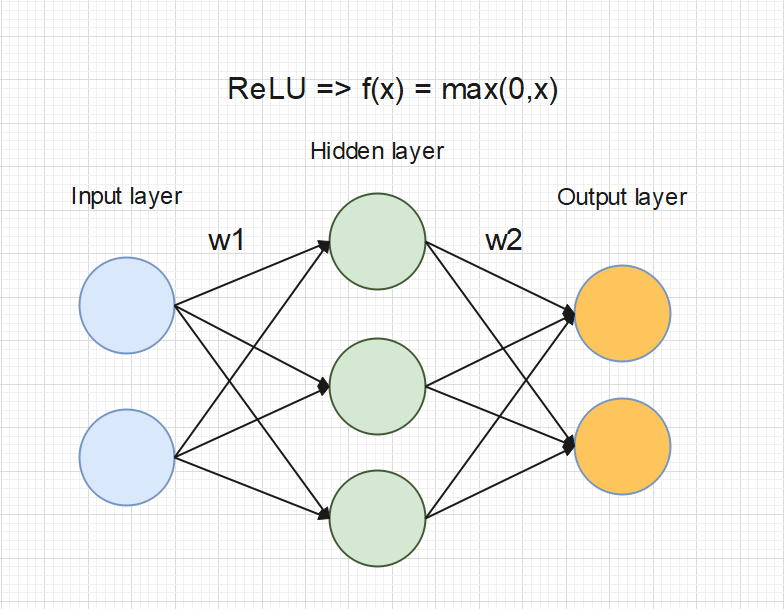

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Defining variables
Certain variables, like the number of nodes, the input and output data, assigning weights, can then instantiate the model.

### Defining the number of nodes
However, for simplicity, the number of nodes is only 2, so it is a very limited model.

In [2]:
i_nodes = 2
o_nodes = 2
h_nodes = 3
batch_size = 8

### Defining the input data and output data
They are generated from the standard normal distribution curve.

In [3]:
x = np.random.randn(batch_size, i_nodes)
y = np.random.randn(batch_size, o_nodes)

print("Input data:", x)
print("Output data:", y)

Input data: [[-1.41653639  1.41300556]
 [-0.53360341 -0.19200384]
 [ 1.07560065 -0.6431622 ]
 [-0.00988423  0.52623998]
 [-2.10099138 -0.18801763]
 [-0.08344295  0.66685288]
 [-0.62392932  0.01378881]
 [ 0.69368491  1.56428154]]
Output data: [[ 0.30686348  0.31145683]
 [-0.57047004  1.10059556]
 [ 1.90716685 -0.1371787 ]
 [ 1.34450382  0.3577927 ]
 [-0.38053711 -0.37703064]
 [-0.54902004  0.99844948]
 [ 0.16644785 -0.85110381]
 [-0.7441936   0.6592415 ]]


### Assigning random weights to the model
Where:
- $w_{1}$ is the synapses between input node and hidden nodes, and
- $w_{2}$ is the synapses between the hidden node and output node.

In [4]:
w1 = np.random.randn(i_nodes, h_nodes)
w2 = np.random.randn(h_nodes, o_nodes)

### Loss arrays as empty arrays

In [5]:
loss_array = np.array([[]])
indices = np.array([[]])

### Obtaining hidden values

if input data, $ i = \begin{bmatrix} a_{1} & a_{2} \\ a_{3} &  a_{4} \\ a_{5} & a_{6} \\ a_{7} & a_{8} \\ a_{9} & a_{10} \\ a_{11} &  a_{12} \\ a_{13} & a_{14} \\ a_{15} & a_{16} \end{bmatrix}, $
and
$ w_{1} = \begin{bmatrix} b_{1} & b_{2} & b_{3} \\ b_{4} & b_{5} & b_{6}  \end{bmatrix}, $

hence, hidden values, $ h_{values} = i \cdot w_{1} $
$ = \begin{bmatrix}a_{1} & a_{2} \\ a_{3} &  a_{4} \\ a_{5} & a_{6} \\ a_{7} & a_{8} \\ a_{9} & a_{10} \\ a_{11} &  a_{12} \\ a_{13} & a_{14} \\ a_{15} & a_{16}  \end{bmatrix} \cdot
 \begin{bmatrix} b_{1} & b_{2} & b_{3} \\ b_{4} & b_{5} & b_{6}  \end{bmatrix} $

> `h_values = x.dot(w1)`

### Activation function for hidden layer - ReLU
The formula for ReLU is:
$\begin{align*} f(x) = max(x, 0)\end{align*} $

where $x$ is the value in that node in the hidden layer. It replaces negative values with 0, and stores it into the variable, $h_{ReLU}$.

> `h_relu = np.maximum(h_values, 0)`

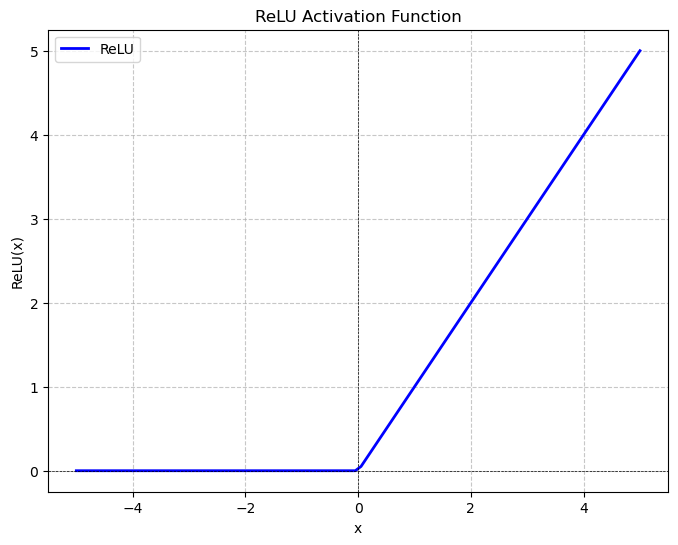

In [6]:
# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate a range of values for x
x_relu = np.linspace(-5, 5, 100)  # Values from -5 to 5, 100 points

# Apply the ReLU function to the range of values
y_relu = relu(x_relu)

# Plot the ReLU function
plt.figure(figsize=(8, 6))
plt.plot(x_relu, y_relu, label='ReLU', color='blue', linewidth=2)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU Activation Function')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### Calculating predictions
Then, it multiplies the values obtained from the hidden layers, $h_{ReLU}$, into the matrix of the second weight.


>`print("Shape of hidden ReLU matrix:", h_relu.shape)`

>`print("Shape of w2 matrix:", w2.shape)`

if hidden ReLU, $ h_{ReLU} = 
\begin{bmatrix} 
a_{1} & a_{2} & a_{3} \\ 
a_{4} &  a_{5} & a_{6} \\ 
a_{7} & a_{8} & a_{9} \\ 
a_{10} & a_{11} & a_{12} \\
a_{13} &  a_{14} & a_{15} \\
a_{16} & a_{17} & a_{18} 
\end{bmatrix}, $ and $ w_{2} = 
\begin{bmatrix} 
b_{1} & b_{2} \\
b_{3} & b_{4} \\
b_{3} & b_{4} \end{bmatrix}, $

hence, output data predictions, $ y_{pred} = h_{ReLU} \cdot w_{2} 
= \begin{bmatrix} 
a_{1} & a_{2} & a_{3} \\ 
a_{4} & a_{5} & a_{6} \\ 
a_{7} & a_{8} & a_{9} \\ 
a_{10} & a_{11} & a_{12} \\
a_{13} & a_{14} & a_{15} \\
a_{16} & a_{17} & a_{18} 
\end{bmatrix} \cdot
\begin{bmatrix} 
b_{1} & b_{2} \\
b_{3} & b_{4} \\
b_{3} & b_{4} \end{bmatrix} $

> `y_pred = h_relu.dot(w2)`

### Loss function
The Mean Squared Error (MSE) is calculated as:

$ mse = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2$

Where:
- $N$ is the total number of data points.
- $y_{i}$ represents the actual values.
- $\hat{y}_i$ represents the predicted values.

Each iteration of finding the loss is appended into the loss array, shown later.

> `loss = np.square(y_pred - y).sum()`

Let each loss be $f = (y - y_{pred})^{2}$. This is known as a loss function.

Gradient Descent, refers to descending along the loss function, in the direction of the slope of f.

Gradient of Prediction, $f' = \frac{δf}{δy_{pred}} = 2(y - y_{pred})$

> `grad_pred = 2 * (y_pred - y)`

### Gradient of prediction is relative to $w_{2}$
Now, we want to link this to the gradient of prediction ($f'$) we found earlier.
Given that the chain rule for differentiation is $\frac{δy}{δx} = \frac{δy}{δu} \cdot \frac{δu}{δx}$,

Gradient of $w_{2} = \frac{δf}{δw_{2}}$
                   = $\frac{δf}{δ?} \cdot \frac{δ?}{δw_{2}}$
                   
First, we replace 1 with the gradient of output data predictions, $y_{pred}$.

Gradient of $w_{2} = \frac{δf}{δy_{pred}} \cdot \frac{δy_{pred}}{δw_{2}}$

We realise that $\frac{δf}{δy_{pred}}$ is actually equal to the gradient of prediction, $f'$, so we replace:

$\therefore$ Gradient of $w_{2} = f' \cdot \frac{δy_{pred}}{δw_{2}}$

Remember that $ y_{pred} = h_{ReLU} \cdot w_{2} $?

Then, $ h_{ReLU} = \frac{y_{pred}}{w_{2}} = \frac{δy_{pred}}{δw_{2}}$

#### $\therefore$ Gradient of $w_{2} =  f' \cdot h_{ReLU}$

Before multiplying, we must check the shapes of the matrices first, to ensure that the number of columns of the first matrix is aligned with the number of rows of the second matrix.

>`print("Shape of hidden ReLU", h_relu.shape)`

>`print("Shape of gradient of w2", grad_pred.shape)`

The output is (8, 3) and (8,2). Since they do not align, we transpose the matrix of hidden ReLU, into (3, 8).

Shapes (3, 8) can be multiplied with (8, 2).

> `grad_w2 = h_relu.T.dot(grad_pred)`

### Finding the gradient of hidden ReLU
By using the Chain Rule as defined earlier, we let $"?"$ define the variable to be replaced with.

$ \frac{δf}{δh_{ReLU}} = \frac{δf}{δ?} \cdot \frac{δ?}{δh_{ReLU}}$

We try to link $y_{pred}$ into the equation.

$ \frac{δf}{δh_{ReLU}} = \frac{δf}{δy_{pred}} \cdot \frac{δy_{pred}}{δh_{ReLU}}$

Similarly, since $y' = \frac{δf}{δy_{pred}}$, and $w_{2} = \frac{δy_{pred}}{δh_{ReLU}}$,

#### $\therefore \frac{δf}{δh_{ReLU}} = y' \cdot w_{2}$

> `grad_h_relu = grad_pred.dot(w2.T)`

### Making a copy of gradient of hidden ReLU values

>`grad_h_values = grad_h_relu.copy()`

### Apply the hidden function of ReLU to this copy of values
Values where it is negative are replaced with 0

>`grad_h_values[h_values < 0] = 0`

### Finding gradient of $w_{1}$

>`grad_w1 = x.T.dot(grad_h_values)`

### Backpropagation - adjusting the weight values according to the gradient of itself

The formula for backpropagation is:

$w_{new} = w_{0} - a(\frac{δError}{δw_{0}})$

where:
- $w_{new}$ is the new weight,
- $w_{0}$ is the old weight,
- $a$ is the learning rate,
- $\frac{δError}{δw_{0}}$ is the derivative of error with respect to weight.

We take $w_{2}$ as an example. Similarly, this is applied to $w_{1}$. 
Substituting the derivative of error with respect to weight, with the expression of the gradient of $w_{2}$ found earlier,

$w_{2} = w_{2} - a(f' \cdot \frac{δy_{pred}}{δw_{2}})$

>`a = 1e-4`

>`w1 = w1 - grad_w1 * a`

>`w2 = w2 - grad_w2 * a`

### Training the model iteratively
The epochs, ie the number of times the model is trained, is defined by the number of times the for loop loops.

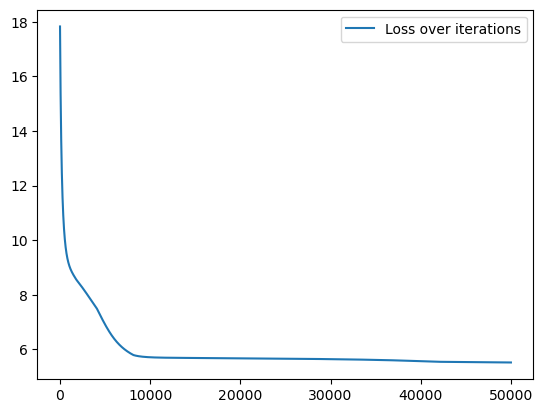

[[ 0.30686348  0.31145683]
 [-0.57047004  1.10059556]
 [ 1.90716685 -0.1371787 ]
 [ 1.34450382  0.3577927 ]
 [-0.38053711 -0.37703064]
 [-0.54902004  0.99844948]
 [ 0.16644785 -0.85110381]
 [-0.7441936   0.6592415 ]]
[[ 0.15177573  0.22833207]
 [ 0.          0.        ]
 [ 1.90716685 -0.13717871]
 [-0.07477074  0.25232376]
 [ 0.15905968 -0.13309292]
 [-0.07676298  0.29682816]
 [ 0.07065893 -0.05912374]
 [-0.40565087  0.98370954]]


In [7]:
for i in range(50000):
    h_values = x.dot(w1)
    h_relu = np.maximum(h_values, 0)
    y_pred = h_relu.dot(w2)

    loss = np.square(y_pred-y).sum()
    loss_array = np.append(loss_array, loss)
    indices = np.append(indices, i)
    grad_pred = 2 * (y_pred - y)

    grad_w2 = h_relu.T.dot(grad_pred)
    grad_h_relu = grad_pred.dot(w2.T)

    grad_h_values = grad_h_relu.copy()
    grad_h_values[h_values < 0] = 0

    grad_w1 = x.T.dot(grad_h_values)

    w1 = w1 - grad_w1 * 1e-4
    w2 = w2 - grad_w2 * 1e-4

plt.plot(indices, loss_array)
plt.legend(['Loss over iterations'])
plt.show()

print(y)
print(y_pred)

### Assessing the accuracy of the model

In [8]:
def calculate_accuracy(y, y_pred):
    """Calculates the accuracy between the predicted and actual values."""

    diff = y_pred - y
    squared_diff = np.square(diff)
    sum_squared_diff = squared_diff.sum()
    n = y.shape[0]
    rmse = np.sqrt(sum_squared_diff / n)
    return rmse

rmse = calculate_accuracy(y, y_pred)
print("Root mean squared error:", rmse)


Root mean squared error: 0.8303192680405955


### Hyperparameter tuning of learning rate of model, $a$

In this example, we randomly select learning rates from the specified search space, train and evaluate the models, and keep track of the best-performing learning rate. You would need to adapt the training and evaluation steps to your specific deep learning model and dataset. Additionally, you can adjust the number of iterations and the search space as needed.

In [9]:
# Define the search space for learning rates
learning_rate_range = np.logspace(-4, -1, num=100)  # Example range from 0.0001 to 0.1

# Number of random iterations
num_iterations = 100

best_learning_rate = None
best_performance = float('-inf')  # Initialize with negative infinity or another suitable value
performance_arr = []

for _ in range(num_iterations):
    # Randomly sample a learning rate from the search space
    learning_rate = np.random.choice(learning_rate_range)
    
    h_values = x.dot(w1)
    h_relu = np.maximum(h_values, 0)
    y_pred = h_relu.dot(w2)

    loss = np.square(y_pred-y).sum()
    loss_array = np.append(loss_array, loss)
    indices = np.append(indices, i)
    grad_pred = 2 * (y_pred - y)

    grad_w2 = h_relu.T.dot(grad_pred)
    grad_h_relu = grad_pred.dot(w2.T)

    grad_h_values = grad_h_relu.copy()
    grad_h_values[h_values < 0] = 0

    grad_w1 = x.T.dot(grad_h_values)

    w1 = w1 - grad_w1 * learning_rate
    w2 = w2 - grad_w2 * learning_rate
    
    # Evaluate the model's performance (e.g., validation accuracy or loss)
    # (This part also depends on your specific setup)
    performance = calculate_accuracy(y, y_pred)
    performance_arr.append(performance)
    
    # Keep track of the best learning rate and performance
    if performance > best_performance:
        best_learning_rate = learning_rate
        best_performance = performance

print("Best Learning Rate:", best_learning_rate)
print("Best Performance:", best_performance)

Best Learning Rate: 0.0026560877829466868
Best Performance: 0.8303190447057538


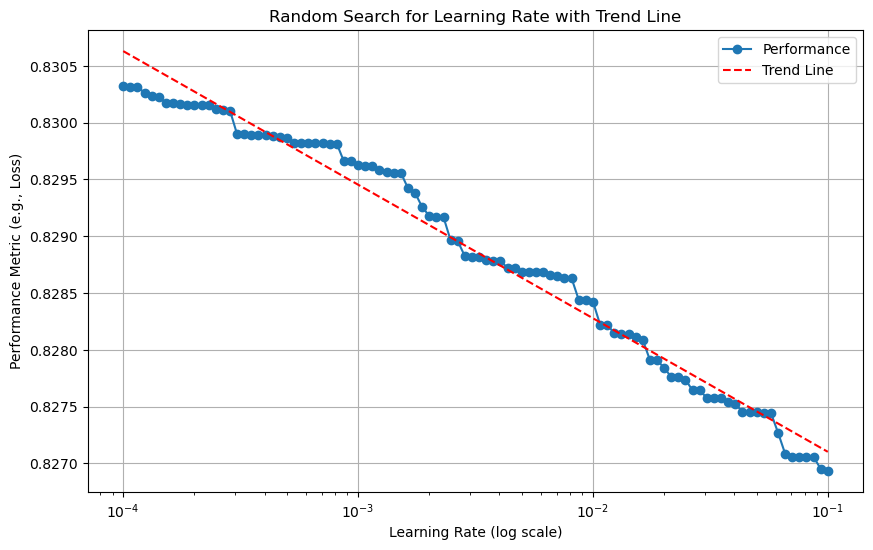

In [10]:
# Plot the learning rates and their corresponding performance
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_range, performance_arr, marker='o', linestyle='-', label="Performance")

# Overlay a linear regression line
z = np.polyfit(np.log10(learning_rate_range), performance_arr, 1)
p = np.poly1d(z)
trend_line = p(np.log10(learning_rate_range))
plt.plot(learning_rate_range, trend_line, 'r--', label="Trend Line")

plt.xscale('log')  # Set x-axis to log scale for better visualization
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Performance Metric (e.g., Loss)")
plt.title("Random Search for Learning Rate with Trend Line")
plt.grid(True)
plt.legend()
plt.show()

### Bonus: Understanding derivatives, using 3D plots analogy

Let $x$ be the range of values, (-8, 8], with intervals of 0.1, and is denoted by: {x ∈ ℝ : -8 ≤ x ≤ 8, x % 0.1 = 0}

Similarly, y is denoted by {y ∈ ℝ : -8 ≤ y ≤ 8, y % 0.1 = 0}

We let the third dimension be $z$, and $z = x^{2} + y^{2}$.

To find the derivative of z, 

$\frac{dz}{dx} = 2x + y^{2}$.

$\frac{dz}{dy} = x^{2} + 2y$.

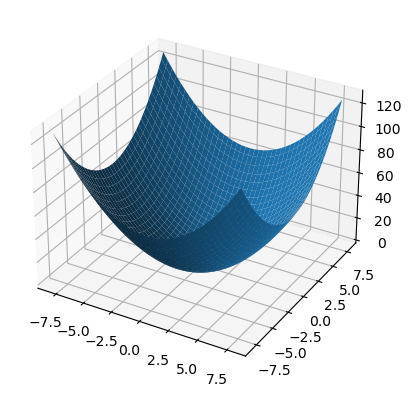

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

x = np.arange(-8, 8, 0.1)
y = np.arange(-8, 8, 0.1)
x, y = np.meshgrid(x, y)

z = x ** 2 + y ** 2

axes = plt.axes(projection = '3d')
axes.plot_surface(x, y, z)


#derivative = 2 * x
#plt.plot(x, y, x, z)
#plt.show()

### Sources:
- The Absolutely Simplest Neural Network Backpropagation Example: https://www.youtube.com/watch?v=khUVIZ3MON8
- Coding a Neural Network: A Beginner's Guide (part 1): https://www.youtube.com/watch?v=TIEKzVwS12g&ab_channel=AboutMedicine
- Backpropagation Step by Step: https://hmkcode.com/ai/backpropagation-step-by-step/